In [1]:
import torch
import random
import datetime
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/tmp/user/1000/ipykernel_50179/2467509857.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
purchase_df = pd.read_csv('../data/purchase.csv')
boxes_df = pd.read_csv('../data/boxes.csv')

In [3]:
purchase_df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [4]:
base_date = datetime.date(2018, 10, 1)
purchase_df['day'] = purchase_df['PURCHASE_DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%d/%m/%Y').date() - base_date).days)

In [5]:
purchase_df.sample(10)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,day
538563,27/2/2019,2C946364558,143.0,1.0,149
1158363,3/12/2018,2A112B8B6E5,237.0,1.0,63
1768505,30/11/2018,29A71EA97A4,271.0,1.0,60
189298,10/2/2019,29DB5243A2A,272.0,1.0,132
1369647,17/12/2018,2C72E324306,8.0,1.0,77
2002576,5/10/2018,2C77DA1886A,118.0,1.0,4
2210023,19/10/2018,2BF9C8AB48B,143.0,1.0,18
1606082,18/11/2018,2BE42E5615A,134.0,1.0,48
511605,26/2/2019,2C64C8A3CB9,162.0,1.0,148
2098898,13/10/2018,2CEE41AC448,108.0,1.0,12


In [6]:
purchase_df.drop(['PURCHASE_DATE'], axis=1, inplace=True)

In [7]:
customer_keys = purchase_df['MAGIC_KEY'].unique()
customer_ids = {customer_keys[i]: i for i in range(len(customer_keys))}

In [8]:
purchase_df.drop(purchase_df[purchase_df['BOX_ID'].isnull()].index, inplace=True)
purchase_df.drop(purchase_df[purchase_df['BOX_COUNT'] < 0].index, inplace=True)

In [9]:
purchase_df['BOX_COUNT'] = purchase_df['BOX_COUNT'].astype(int)
purchase_df['BOX_ID'] = purchase_df['BOX_ID'].astype(int)

In [10]:
purchase_df.sample(10)

,MAGIC_KEY,BOX_ID,BOX_COUNT,day
278447,2A06FB557FC,258,1,137
1227387,2BE09804B8D,131,1,68
639299,2CACF6F9C7B,119,1,94
1347574,2C64BB32662,163,1,75
2315305,2C820CFC482,163,1,27
86367,2BE2249BEE6,142,1,127
1389894,2C0368FA6F5,89,1,84
1067448,2C442FEE6FC,162,1,120
1019404,2C12E6472F1,27,1,117
1870211,2953EBFB297,231,1,59


In [11]:
len(purchase_df['MAGIC_KEY'].unique())

1274087

In [12]:
len(purchase_df)

2455800

In [13]:
purchases = [[] for _ in range(len(customer_keys))]
purchase_df.apply(lambda x: purchases[customer_ids[x['MAGIC_KEY']]].append((x['BOX_ID'], x['BOX_COUNT'], x['day'])), axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2455859    None
2455860    None
2455861    None
2455862    None
2455863    None
Length: 2455800, dtype: object

In [14]:
prob3_df =pd.read_csv('../data/problem 3.csv')
prob3_df.head()

,MAGIC_KEY
0,2BCFE9C06A7
1,2C2A872B5A2
2,2C6A897671B
3,2C6F1287F53
4,2C658198CC9


In [15]:
len(prob3_df)

5379

In [16]:
prob3_customers = [customer_ids[x] for x in prob3_df['MAGIC_KEY'].unique()]
len(prob3_customers)

5379

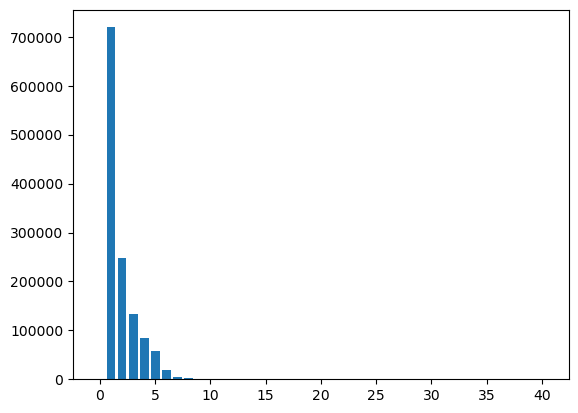

In [17]:

purchase_counts = {}
for i, _ in enumerate(purchases):
    cnt = len(purchases[i])
    if cnt not in purchase_counts:
        purchase_counts[cnt] = 1
    else:
        purchase_counts[cnt] += 1

#generate bar plot from purchase counts
        
import matplotlib.pyplot as plt
plt.bar(purchase_counts.keys(), purchase_counts.values())
plt.show()

In [18]:
for i, _ in enumerate(purchases):
    purchases[i].sort(key=lambda x: x[2])

In [19]:
a = 10
b = 10
print("single purchase: ")
for i, p in enumerate(purchases):
    if len(p) == 1:
        if a > 0:
            print(i, p)
            a -= 1

print("more than 5 purchase: ")
for i, p in enumerate(purchases):
    if len(p) > 5:
        if b > 0:
            print(i, p)
            b -= 1


single purchase: 
0 [(12, 1, 123)]
1 [(12, 1, 123)]
3 [(6, 1, 123)]
4 [(4, 1, 123)]
6 [(227, 1, 123)]
7 [(6, 1, 123)]
10 [(12, 1, 123)]
11 [(231, 1, 123)]
13 [(278, 1, 123)]
16 [(231, 1, 123)]
more than 5 purchase: 
5 [(238, 1, 14), (238, 1, 36), (238, 1, 56), (238, 1, 80), (238, 1, 100), (238, 1, 123)]
14 [(203, 1, 35), (203, 1, 53), (203, 1, 63), (221, 1, 72), (203, 1, 81), (203, 1, 87), (238, 1, 97), (204, 1, 123), (204, 1, 135), (272, 1, 150)]
38 [(8, 1, 15), (8, 1, 30), (8, 1, 60), (8, 1, 82), (8, 1, 104), (8, 1, 123)]
39 [(238, 1, 20), (238, 1, 44), (268, 1, 54), (238, 1, 67), (238, 1, 76), (238, 1, 89), (238, 1, 98), (238, 1, 105), (228, 1, 123), (238, 1, 129), (238, 1, 133), (238, 1, 138), (238, 1, 142), (230, 1, 147), (238, 1, 150)]
42 [(260, 1, 8), (203, 1, 23), (221, 1, 38), (221, 1, 65), (271, 1, 84), (272, 1, 104), (221, 1, 123), (276, 1, 145)]
43 [(137, 1, 6), (137, 1, 23), (137, 1, 42), (137, 1, 62), (137, 1, 79), (174, 1, 97), (174, 1, 123)]
44 [(238, 1, 18), (238, 1, 1

In [20]:
boxes_df[109:111]

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
109,110,Premium,Delivery from Collection Point,0.0,4.4,15.96
110,111,Premium,Delivery from Collection Point,0.0,4.7,15.96


In [21]:
len(boxes_df)

290

In [22]:
def meat_consumed(cid, start_day, end_day):
    boxes = filter(lambda x: x[2] >= start_day and x[2] < end_day, purchases[cid])
    meat_consumed = 0
    for id, cnt, _ in boxes:
        meat_consumed += cnt * boxes_df.at[id - 1, 'MEAT']
    return meat_consumed

def meat_consumption_rate(cid, end_day=151):
    if len(purchases[cid]) == 0:
        return 0.0
    start = purchases[cid][0][2]
    return meat_consumed(cid, start, end_day) / (end_day - start)

In [23]:
last_day = purchase_df['day'].max()
last_day

150

In [24]:
last_date = datetime.date(2019, 2, 28)
(last_date - base_date).days

150

In [25]:
first_day = purchase_df['day'].min()
first_day

0

In [26]:
meat_consumption_rate(0)

0.05357142857142857

In [27]:
def last_meat_consumption(cid, end_day=150):
    consumptions = list(filter(lambda x: x[2] < end_day and boxes_df.at[x[0] - 1, 'MEAT'] > 0.0, purchases[cid]))
    try:
        bid, cnt, day = consumptions[-1]
    except:
        return None
    return [cnt * boxes_df.at[bid - 1, 'MEAT'], 
            cnt,
            end_day - day,
            int(boxes_df.at[bid - 1, 'QUALITY'] == 'Standard'), 
            int('CoD' not in str(boxes_df.at[bid - 1, 'DELIVERY_OPTION'])), 
            float(boxes_df.at[bid - 1, 'UNIT_PRICE'])]
last_meat_consumption(3588, 150)

[4.4, 1, 27, 0, 1, 15.96]

In [28]:
val_day = 120

def filter_val_idx(val_idx):
    filtered_val_idx = []
    for cid in val_idx:
        if len(purchases[cid]) < 2:
            continue
        last_meat = last_meat_consumption(cid, val_day)
        if last_meat is None:
            continue
        next_meat = meat_consumed(cid, val_day, val_day + 15)
        if next_meat <= 0.0:
            continue
        filtered_val_idx.append(cid)
    return filtered_val_idx

In [29]:
split = int(len(purchases) * 0.1)
idx = [i for i in range(len(purchases))]

random.shuffle(idx)
val_idx = idx[:split]
val_idx = filter_val_idx(val_idx)
train_idx = idx[split:]

def generate_batch(day, batch_size, split='train'):
    batch = []
    labels = []
    n = 0
    current_idx = []
    if split == 'train':
        random.shuffle(train_idx)
        current_idx = train_idx
    else:
        random.shuffle(val_idx)
        current_idx = val_idx
    for cid in current_idx:
        if len(purchases[cid]) < 2:
            continue
        last_meat = last_meat_consumption(cid, day)
        if last_meat is not None:
            rate = meat_consumption_rate(cid, day)
            next_meat = meat_consumed(cid, day, day + 15)
            if next_meat > 0.0:
                features = [rate]
                features.extend(last_meat)
                batch.append(features)
                labels.append(next_meat)
                n += 1
                if split=='train' and n == batch_size:
                    return batch, labels
    if split == 'train':
        return None, None
    else:
        return batch, labels
batch, labels = generate_batch(val_day, len(val_idx), 'val')
print(split)
print(len(batch))
print(batch)
print(labels)

127410
16126
[[0.06285714285714286, 2.2, 1, 35, 0, 1, 23.98], [0.044000000000000004, 2.2, 1, 50, 0, 1, 23.98], [0.12631578947368421, 2.4, 1, 19, 0, 1, 13.96], [0.04083333333333334, 1.8, 1, 26, 0, 1, 19.98], [0.07474747474747476, 2.4, 1, 5, 1, 0, 13.96], [0.10638297872340426, 2.5, 1, 17, 1, 1, 13.96], [0.06984126984126984, 2.2, 1, 25, 0, 1, 23.98], [0.07222222222222223, 1.3, 1, 18, 0, 1, 15.98], [0.03492063492063492, 2.2, 1, 63, 0, 1, 23.98], [0.06206896551724138, 1.8, 1, 29, 0, 1, 19.98], [0.09999999999999999, 2.9, 1, 29, 1, 1, 13.96], [0.10416666666666667, 2.5, 1, 18, 1, 1, 13.96], [0.10412371134020618, 2.9, 1, 30, 1, 1, 13.96], [0.0949367088607595, 2.5, 1, 18, 1, 1, 13.96], [0.06495726495726496, 2.2, 1, 28, 0, 1, 19.98], [0.22, 3.3, 1, 15, 0, 1, 15.96], [0.11612903225806452, 3.6, 1, 31, 0, 1, 15.96], [0.08135593220338982, 2.4, 1, 19, 1, 1, 13.96], [0.061702127659574474, 2.2, 1, 16, 0, 1, 19.98], [0.04878048780487805, 2.2, 1, 24, 0, 1, 19.98], [0.042352941176470586, 1.8, 1, 25, 0, 1, 

In [30]:
import gc

class MeatPredictor(torch.nn.Module):
    def __init__(self):
        super(MeatPredictor, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(7, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.mlp(x).reshape(-1)

model = MeatPredictor()
model(torch.tensor(batch, dtype=torch.float32))

tensor([0.1424, 0.1580, 0.1215,  ..., 0.1247, 0.1236, 0.1179],
       grad_fn=<ViewBackward0>)

In [31]:
torch.cuda.empty_cache()
gc.collect()

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
best_loss = 1e9
batch_size = 256
epochs = 10
model_save_dir = '../models/'

val, val_labels = generate_batch(val_day, len(val_idx), 'val')
val = torch.tensor(val, dtype=torch.float32)
val_labels = torch.tensor(val_labels, dtype=torch.float32)

for epoch in range(epochs):
    batch, labels = generate_batch(random.randint(70, 136), batch_size)
    if batch is None:
        continue
    batch = torch.tensor(batch, dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.float32)
    optimizer.zero_grad()
    outputs = model(batch)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(epoch, loss.item())
    if epoch % 20 == 0:
        val_outputs = model(val)
        val_loss = loss_fn(val_outputs, val_labels)
        print("Validation loss: ", val_loss.item())
        if val_loss.item() < best_loss:
            torch.save(model.state_dict(), f'{model_save_dir}meat_predictor.pth')
            best_loss = val_loss.item()

model.load_state_dict(torch.load(f'{model_save_dir}meat_predictor.pth'))

0 5.495362758636475
Validation loss:  4.754794597625732


<All keys matched successfully>

In [39]:
def predict(cid, day):
    rate = meat_consumption_rate(cid, day)
    last_meat = last_meat_consumption(cid, day)
    if last_meat is not None:
        features = [rate]
        features.extend(last_meat)
        batch = [features]
        batch = torch.tensor(batch, dtype=torch.float32)
        return model(batch).item()
    return 0.0

In [42]:
data = []
for cid in prob3_customers:
    data.append({
        'MAGIC_KEY': customer_keys[cid],
        'MEAT': predict(cid, 151)
    })
sub_df = pd.DataFrame(data, columns=['MAGIC_KEY', 'MEAT'])
sub_df.to_csv('../submissions/submission-3.csv', index=False)